In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
diabetes_dataset=pd.read_csv("../datasets/diabetes.csv")

In [4]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:

diabetes_dataset.shape

(768, 9)

In [9]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
X=diabetes_dataset.drop(columns=['Outcome'],axis=1)
y=diabetes_dataset['Outcome']

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(614, 8)

In [17]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [18]:
X_test.shape

(154, 8)

In [26]:

#information of dataset 
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
#any null values 
#not necessary in above information we can see
diabetes_dataset.isnull().values.any()

np.False_

In [31]:
import matplotlib.pyplot as plt 
import matplotlib_inline

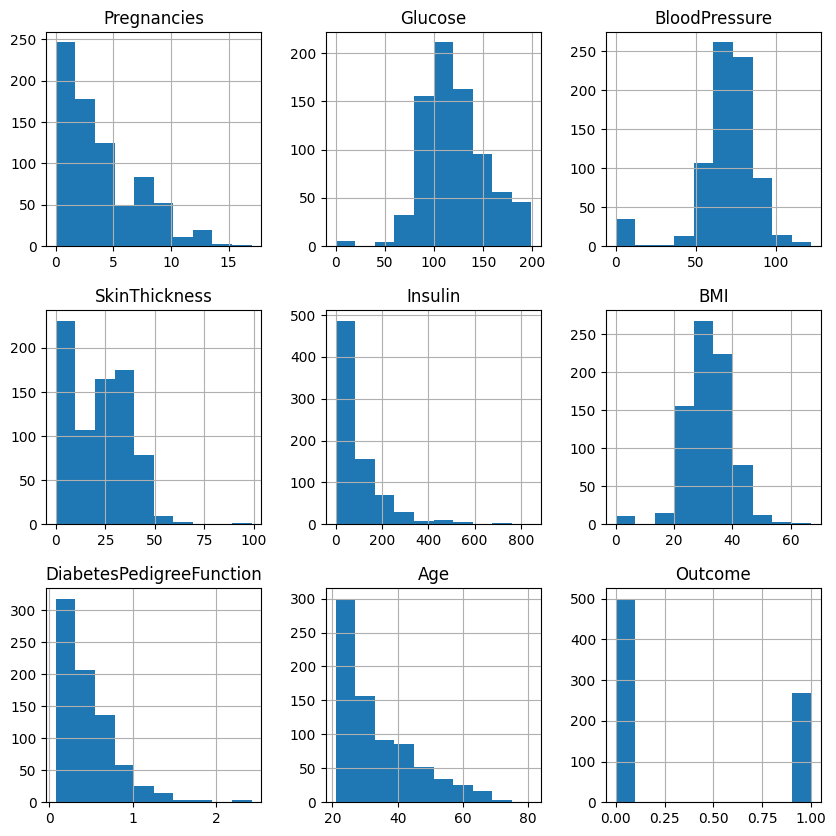

In [32]:
diabetes_dataset.hist(bins=10,figsize=(10,10))
plt.show()

In [36]:
import seaborn as sns

<Axes: >

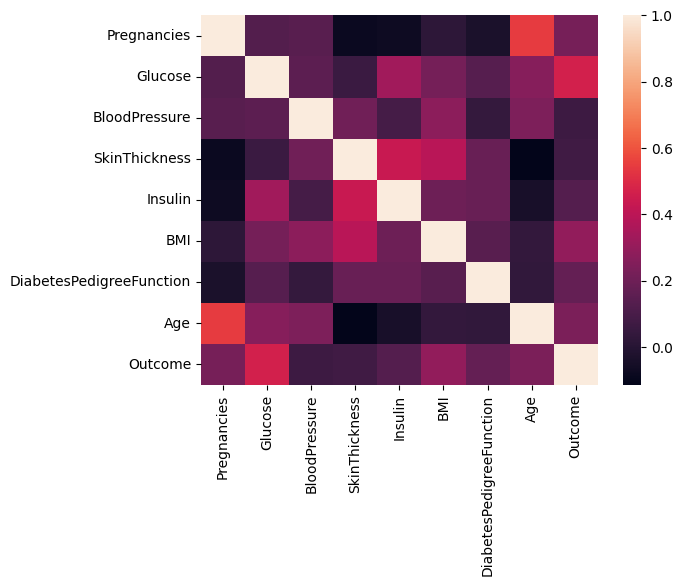

In [37]:
#correlation 
sns.heatmap(diabetes_dataset.corr())
# we can see skin thickness, insulin,pregancies and age are full independent to each other 
#age and pregencies has negative correlation

C:\Users\Navya\AppData\Local\Temp\ipykernel_9100\3653824216.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=diabetes_dataset['Outcome'],palette='Set1')


<Axes: xlabel='count', ylabel='Outcome'>

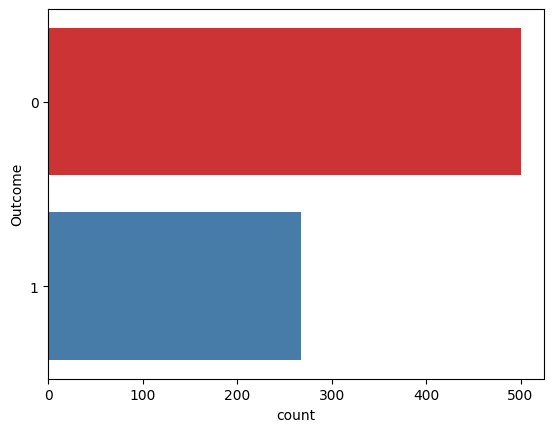

In [38]:

#lets count total outcome in each target 0 1 
#0 means no diabeted 
#1 means patient with diabetes 
sns.countplot(y=diabetes_dataset['Outcome'],palette='Set1')

<Axes: >

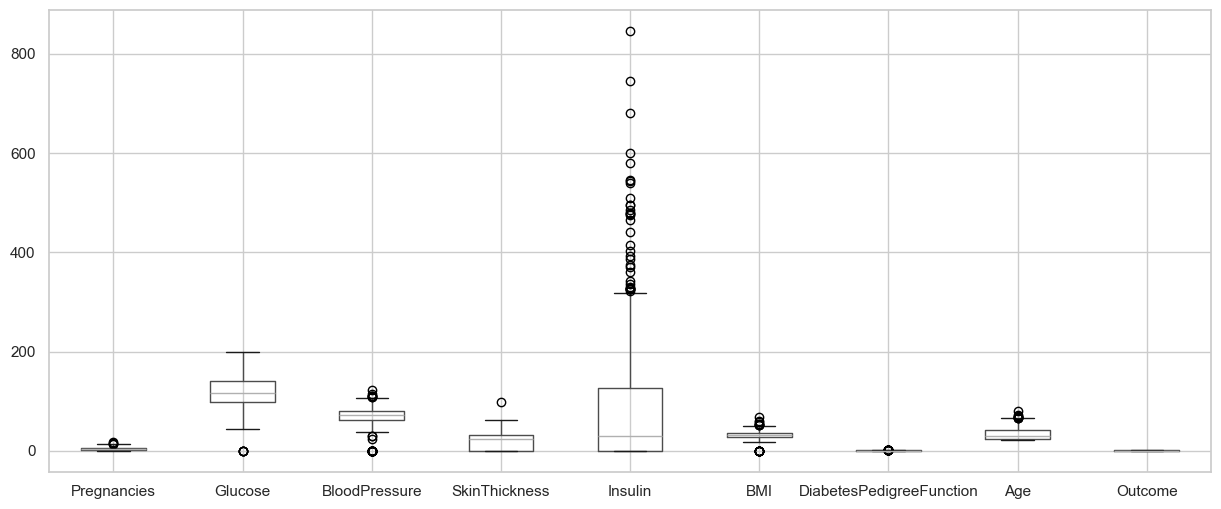

In [39]:

#box plot for outlier visualization 
sns.set(style="whitegrid")
diabetes_dataset.boxplot(figsize=(15,6))

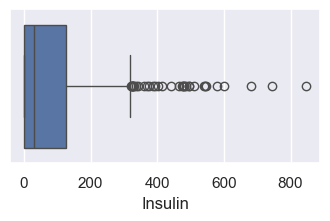

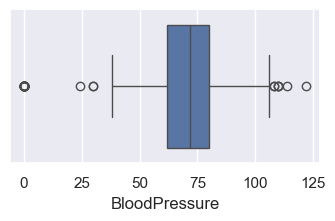

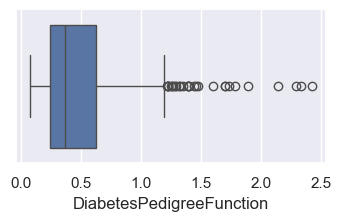

In [41]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=diabetes_dataset['Insulin'])
plt.show()
sns.boxplot(x=diabetes_dataset['BloodPressure'])
plt.show()
sns.boxplot(x=diabetes_dataset['DiabetesPedigreeFunction'])
plt.show()

In [43]:

#outlier remove

Q1=diabetes_dataset.quantile(0.25)
Q3=diabetes_dataset.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [44]:
#outlier remove
diabetes_dataset_out = diabetes_dataset[~((diabetes_dataset < (Q1 - 1.5 * IQR)) |(diabetes_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_dataset.shape,diabetes_dataset_out.shape
#more than 80 records deleted



((768, 9), (639, 9))

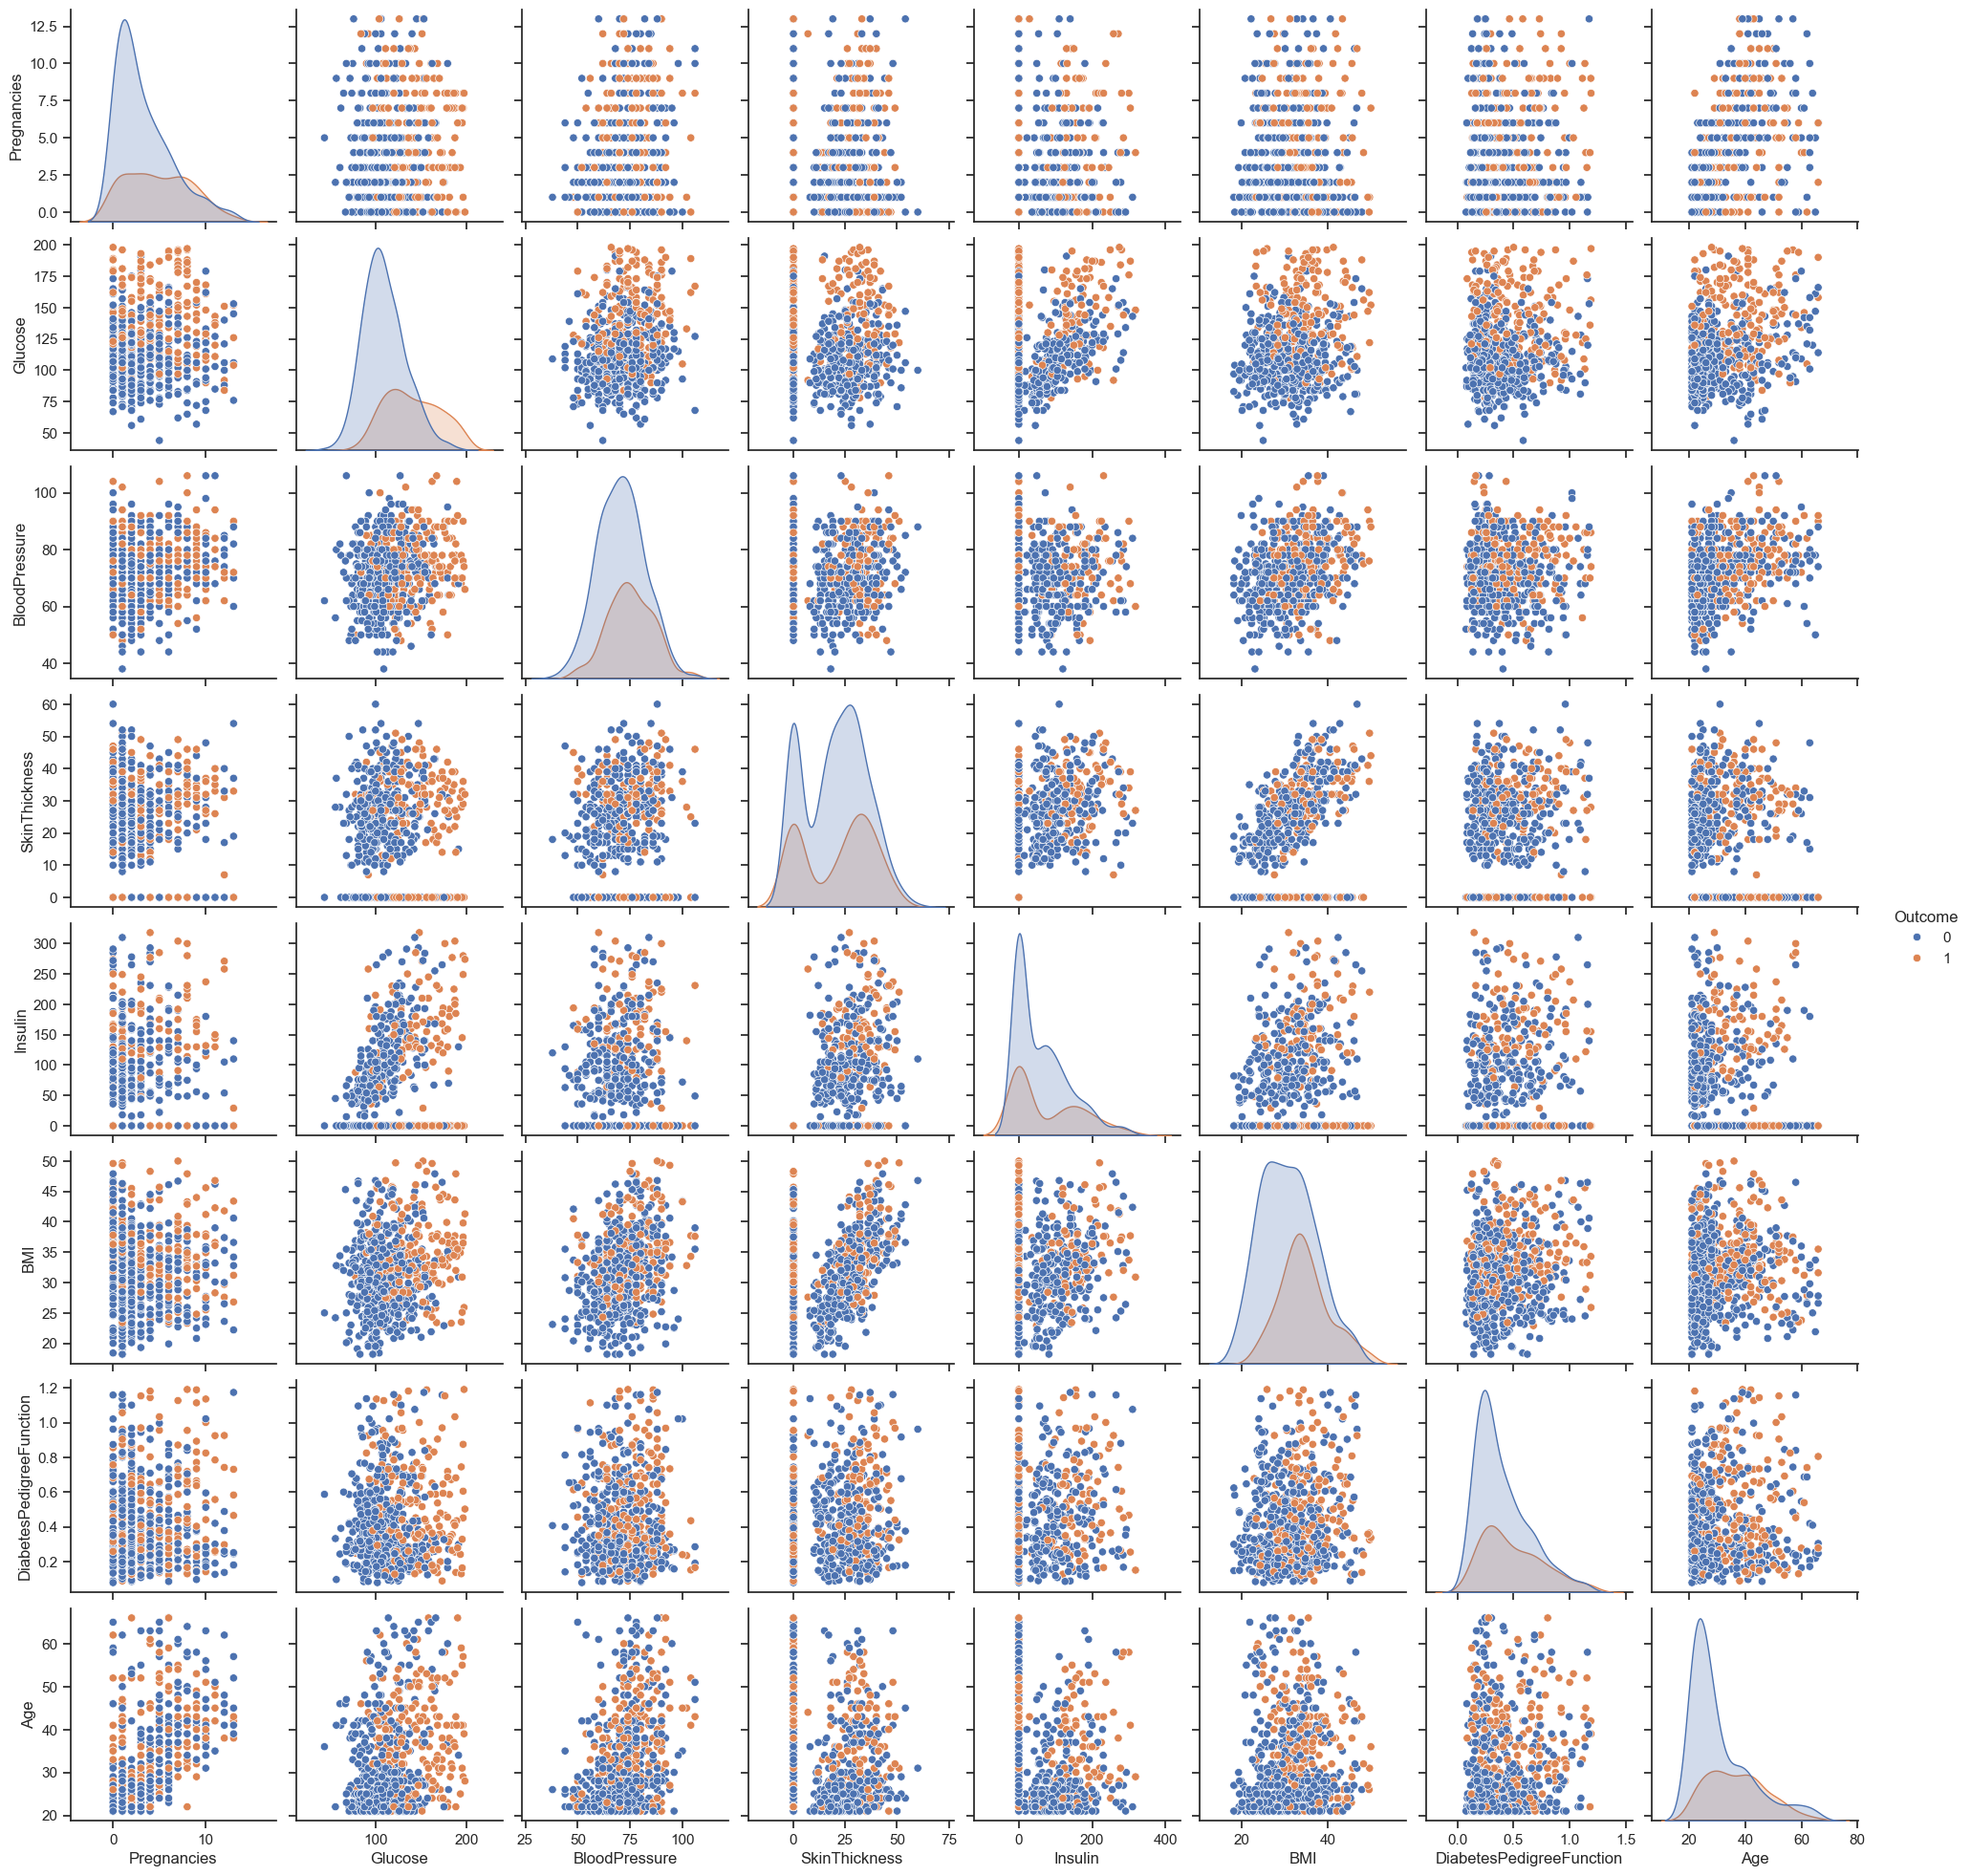

In [45]:

#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(diabetes_dataset_out, hue="Outcome")
plt.show()

In [46]:

#lets extract features and targets
X=diabetes_dataset_out.drop(columns=['Outcome'])
y=diabetes_dataset_out['Outcome']

In [47]:

#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [48]:

train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])


In [61]:

#Lets build the model

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

lr=LogisticRegression(max_iter=1000)
lr.fit(train_X,train_y)
y_pred=lr.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(lr,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line


Accuracy 0.7421875 ROC 0.6829545454545455
TP:  [ 7  7  7 11 11  6  8  9 11  8]
TN:  [35 30 33 29 33 33 32 32 31 29]
FN:  [ 9  9  9  5  5 10  8  7  5  8]
FP:  [1 5 2 6 2 2 3 3 4 6]


In [52]:

#Support Vector Machine
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(train_X,train_y)
y_pred=svc.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(svc,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7421875 ROC 0.6829545454545455
TP:  [ 7  7  7 11 11  6  8  9 11  8]
TN:  [35 30 34 31 33 33 32 34 31 30]
FN:  [ 9  9  9  5  5 10  8  7  5  8]
FP:  [1 5 1 4 2 2 3 1 4 5]


In [53]:

#KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X,train_y)
y_pred=knn.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(knn,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.6953125 ROC 0.6556818181818183
TP:  [ 7  8 10 10  8  4  6  9 10  6]
TN:  [29 27 31 29 30 29 31 31 27 28]
FN:  [ 9  8  6  6  8 12 10  7  6 10]
FP:  [7 8 4 6 5 6 4 4 8 7]


In [54]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7578125 ROC 0.6943181818181817
TP:  [ 9  6  9 10  9  6  6 10 14  6]
TN:  [34 32 32 30 31 31 33 31 31 31]
FN:  [ 7 10  7  6  7 10 10  6  2 10]
FP:  [2 3 3 5 4 4 2 4 4 4]


In [55]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(train_X,train_y)
y_pred=gnb.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(gnb,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.75 ROC 0.715909090909091
TP:  [ 8 10  8 12  9  9  9 10 13 10]
TN:  [34 31 29 28 29 30 29 28 28 27]
FN:  [8 6 8 4 7 7 7 6 3 6]
FP:  [2 4 6 7 6 5 6 7 7 8]


In [56]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbs=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
gbs.fit(train_X,train_y)
y_pred= gbs.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(gbs ,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.71875 ROC 0.659090909090909
TP:  [11  5  7 10 10  6  9 10 12  8]
TN:  [31 31 30 31 26 32 32 32 30 28]
FN:  [ 5 11  9  6  6 10  7  6  4  8]
FP:  [5 4 5 4 9 3 3 3 5 7]


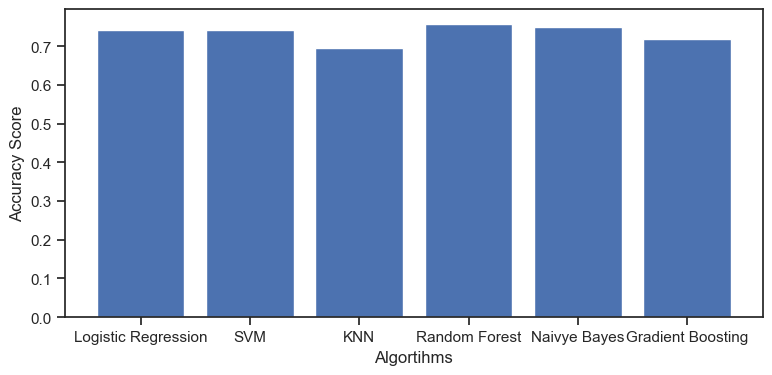

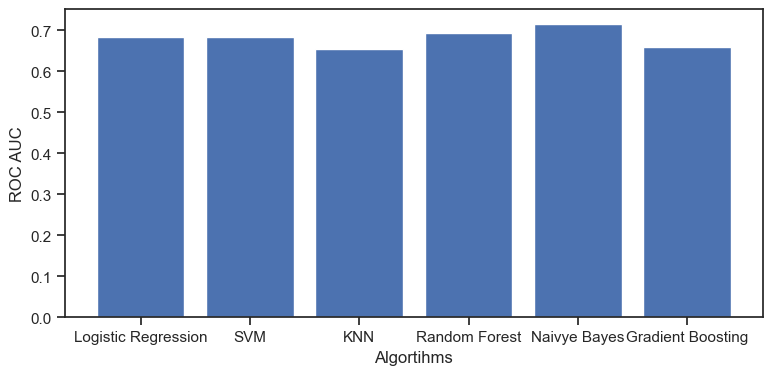

In [58]:

#lets plot the bar graph

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

ax=plt.figure(figsize=(9,4))
plt.bar(['Logistic Regression','SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],roc,label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

In [59]:

input_data = (2,108,62,32,56,25.2,0.128,21)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
#std_data = scaler.transform(input_data_reshaped)

prediction = clf.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person is non Diabetic")

else:
  print("The Person is Diabetic")

[0]
The Person is non Diabetic


c:\Users\Navya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
import pickle

# Save the trained model (change `model` to the actual model you want to save)
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)  # Change 'lr' to your final model variable
